# Chapter 9. 입출력 작업
> 자료 없이 이론부터 펼치는 것은 중대한 잘못이다.  
-셜록 홈즈

입출력 작업은 금융이나 대규모 데이터를 다루는 응용 분야에서 가장 중요한 작업입니다. 하드디스크와 메모리 사이의 데이터 전송이 충분히 빠르지 않기 때문에 입출력 작업은 성능이 중요한 계산 작업에서 병목이 된다. 즉, 느린 입출력으로 인해 CPU가 노는 현상이 발생합니다.  
오늘날의 금융이나 기업 분석의 대부분은 **페타**스케일 규모의 빅데이터에 직면해 있지만 하나하나의 분석 작업은 보통 중간 정도 크기의 데이터를 다루게 됩니다. 다음은 이에 관한 최근 연구 결과를 인용하고 있습니다.  
하나의 금융 분석 작업은 보통 몇 GB 이하의 데이터를 처리하는데, 이 정도 크기가 파이썬이나 넘파이, 판다스, `PyTables`와 같은 과학기술 라이브러리가 다루기에 가장 최적의 크기입니다. 이 정도 크기의 데이터는 메모리상에서 분석할 수 있기 때문에 최신 CPU나 GPU의 고속 성능을 기대할 수 있습니다. 그러나 이러한 데이터도 어쨌든 메모리로 읽어 들여야 하고 결과는 하드디스크에 써야 합니다.  
이번 장에서는 다음과 같은 주제를 다룹니다.  
* 기본 파이썬 입출력: 파이썬에서는 어떤 객체든 직렬화하여 디스크에 저장하고 반대로 디스크에서 이를 읽어 메모리로 옮길 수 있는 내장 함수가 있습니다. 또한 파이썬은 텍스트 파일이나 SQL 데이터베이스 작업에도 강합니다. 넘파이는 `ndarray` 객체를 고속으로 저장하고 읽는 전용 함수도 제공합니다.
* 판다스를 이용한 입출력: 판다스 라이브러리는 사용자 편의를 위해 여러 가지 포맷(CSV, JSON 등)으로 저장된 데이터를 읽고 쓰는 함수를 제공합니다.
* PyTables를 이용한 입출력: `PyTables`는 HDF5 표준(http://www.hdfgroup.org)을 사용하여 대규모 데이터 집합을 대상으로 빠른 입출력을 얻을 수 있습니다. 속도는 사용한 하드웨어에 의해서 제한되지만...
* TsTable을 이용한 입출력: `TsTable`는 `PyTables` 기반으로 만들어졌고 시계열 데이터를 빠르게 저장하고 읽을 수 있습니다.  

## 9.1 기본 파이썬 입출력
파이썬은 다양한 입출력 기능을 가지고 있습니다. 어떤 기능은 성능에, 다른 것은 유연성에 최적화되어 있습니다. 그렇기에 대화형 작업이든 대규모 작업이든 모두 가리지 않고 쉽게 사용할 수 있습니다.
### 9.1.1 객체를 디스크에 쓰기
문서화 작업 또는 다른 사람들과의 공유를 위해 파이썬 객체를 나중에 다시 사용할 수 있도록 저장하고 싶은 경우가 있습니다. 한 가지 방법은 `pickle` 모듈을 사용하는 것입니다. 이 모듈은 대부분의 파이썬 객체를 직렬화할 수 있는데, 직렬화가 뭐냐? 직렬화(serialize)는 객체를 바이트열로 변환하는 작업이고, 역직렬화(deserialize)는 반대의 작업을 말합니다.  
우선 몇 가지 패키지를 임포트하고 플롯 설정을 하겠습니다.

In [1]:
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

다음의 예제는 우선 의사 난수 데이터를 리스트 객체에 저장하는 것부터 시작합니다.

In [2]:
import os
import pickle
import numpy as np
from random import gauss # 정규분포 난수를 생성하는 gauss 함수 임포트

In [3]:
a = [gauss(1.5, 2) for i in range(1000000)] # 난수로 구성된 리스트 생성

In [4]:
path = os.getcwd() + '\\Temp\\data\\'
pkl_file = open(path + 'data.pkl', 'wb') # 파일을 바이너리 모드(wb)로 열기

우리에게 필요한 두 가지 중요 함수는 객체를 쓰는 `pickle.dump()`와 이를 다시 메모리로 올리는 `pickle.load()` 함수입니다.

In [5]:
%time pickle.dump(a, pkl_file)

Wall time: 34 ms


In [6]:
pkl_file.close()

In [7]:
pkl_file = open(path + 'data.pkl', 'rb')

In [8]:
%time b = pickle.load(pkl_file)

Wall time: 42 ms


In [9]:
a[:3]

[0.9911391678911335, 2.020388127191475, 3.9866635113182856]

In [10]:
b[:3]

[0.9911391678911335, 2.020388127191475, 3.9866635113182856]

In [11]:
np.allclose(np.array(a), np.array(b)) # a와 b를 ndarray 객체로 변환하고 np.allclose() 함수로 둘이 같은 데이터임을 보이기

True

하나의 객체를 `pickle`로 저장하고 읽는 건 꽤나 간단한 일입니다. 그런데 만약 객체가 두 개면 어떨까요?

In [12]:
pkl_file = open(path + 'data.pkl', 'wb')

In [13]:
%time pickle.dump(np.array(a), pkl_file) # a 배열을 직렬화하여 저장

Wall time: 72 ms


In [14]:
%time pickle.dump(np.array(a) ** 2, pkl_file) # a를 제곱한 배열을 직렬화하여 추가로 저장

Wall time: 75 ms


In [15]:
pkl_file.close()

두 `ndarray` 객체를 도로 메모리로 읽어 들이려면 어떻게 해야 할까요?

In [16]:
pkl_file = open(path + 'data.pkl', 'rb')

In [17]:
x = pickle.load(pkl_file) # 처음 저장된 객체를 빼냅니다.
x[:4]

array([ 0.99113917,  2.02038813,  3.98666351, -2.69680446])

In [18]:
y = pickle.load(pkl_file) # 두번째로 저장된 객체를 빼냅니다.
y[:4]

array([ 0.98235685,  4.08196818, 15.89348595,  7.2727543 ])

In [19]:
pkl_file.close()

앞의 예제에서 `pickle`은 FIFO(first in first out) 순서로 저장하고 반환함을 알 수 있습니다.[큐(queue)와 유사] 여기에는 한 가지 문제점이 있습니다. 사용자가 어떤 객체가 저장되어 있는지 알 수 있는 상위 정보가 없다는 점이죠. 유용한 해결 방법은 직접 객체를 저장하지 않고 사전 객체에 다른 객체를 담아서 저장하는 것입니다.

In [20]:
pkl_file = open(path + 'data.pkl', 'wb')
pickle.dump({'x': x, 'y': y}, pkl_file) # 두 ndarray 객체를 포함하는 사전 객체 저장
pkl_file.close()

In [21]:
pkl_file = open(path + 'data.pkl', 'rb')
data = pickle.load(pkl_file)

In [22]:
pkl_file.close()
for key in data.keys():
    print(key, data[key][:4])

x [ 0.99113917  2.02038813  3.98666351 -2.69680446]
y [ 0.98235685  4.08196818 15.89348595  7.2727543 ]


그러나 이 방법을 쓰면 모든 객체를 한 번에 쓰고 읽어야 합니다. 편의성을 위해서 이 정도는 감수해야 합니다.  
> **CAUTION**_ 호환성 문제  
객체를 직렬화하는 데 `pickle`을 사용하는 것은 쉽습니다. 하지만 파이썬 패키지가 업그레이드되거나 새 버전이 나오면 옛날 버전에서 직렬화된 객체를 다룰 수 없게 될 수도 있습니다. 플랫폼이나 운영체제 간에 이러한 객체를 공유할 떄도 마찬가지로 문제가 발생할 수 있고요. 따라서 다음 절에서 설명할 넘파이나 판다스가 내장한 읽기 및 쓰기 기능을 사용할 것을 권장합니다.

### 9.1.2 텍스트 파일 읽고 쓰기
텍스트 처리는 파이썬의 강점입니다. 사실 파이썬을 상업용/과학기술용으로 쓰는 많은 이들은 텍스트 처리 때문에 파이썬을 사용합니다. 파이썬에서는 여러 가지 방법으로 문자열 객체와 텍스트 파일을 다룰 수 있습니다.  
CSV 파일 형태로 저장해서 공유해야 할 대량의 데이터가 있다고 가정하자. 이 파일을 특별한 구조를 가지고 있긴 하지만 기본적으로는 텍스트 파일입니다. 다음 코드는 가짜 데이터 집합을 `ndarray` 객체로 만들고 `DatetimeIndex` 객체를 생성한 다음 두 개를 합쳐서 CSV 파일로 저장합니다.

In [23]:
import pandas as pd

In [24]:
rows = 5000 # 데이터 행의 개수
a = np.random.standard_normal((rows, 5)).round(4) # 난수로 이루어진 ndarray 객체 생성

In [25]:
a

array([[ 0.7373, -1.8111, -0.3021,  0.5963, -0.5203],
       [-0.7525, -0.0078, -0.4862, -1.3546, -0.1868],
       [ 0.5802, -1.0272,  0.155 , -0.0536,  0.1536],
       ...,
       [-0.1363,  1.0478,  0.5151, -0.4401,  1.898 ],
       [-0.7663,  0.3267,  0.3713, -1.191 , -1.4457],
       [-0.4391,  0.1065,  0.7569, -1.2   ,  0.8267]])

In [26]:
t = pd.date_range(start='2019/1/1', periods=rows, freq='H') # 적정한 길이의 (시간 간격) DatetimeIndex 객체 생성

In [27]:
t

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2019-07-27 22:00:00', '2019-07-27 23:00:00',
               '2019-07-28 00:00:00', '2019-07-28 01:00:00',
               '2019-07-28 02:00:00', '2019-07-28 03:00:00',
               '2019-07-28 04:00:00', '2019-07-28 05:00:00',
               '2019-07-28 06:00:00', '2019-07-28 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='H')

In [28]:
csv_file = open(path + 'data.csv', 'w') # 쓸 파일 열기

In [29]:
# 헤더 행을 정의하고 첫 줄에 쓰기
header = 'date,no1,no2,no3,no4,no5\n'
csv_file.write(header)

25

In [30]:
for t_, (no1, no2, no3, no4, no5) in zip(t, a): # 데이터를 행 단위로 조합
    s = f'{t_},{no1},{no2},{no3},{no4},{no5}\n' # 문자열 생성
    csv_file.write(s) # 한 줄씩 쓰기(CSV 텍스트 파일 뒤에 붙이기)

In [31]:
csv_file.close()

반대로 데이터를 읽는 것은 다음과 같다. 우선 CSV 파일을 열고 파일 객체의 `readline()` 메서드로 내용을 한 줄씩 읽습니다. `readlines()` 메서드로 모든 줄을 한 번에 읽을 수도 있습니다.

In [32]:
csv_file = open(path + 'data.csv', 'r') # 읽기 모드로 파일 열기

In [33]:
for i in range(5):
    print(csv_file.readline(), end='') # 내용을 한 줄씩 읽고 출력

date,no1,no2,no3,no4,no5
2019-01-01 00:00:00,0.7373,-1.8111,-0.3021,0.5963,-0.5203
2019-01-01 01:00:00,-0.7525,-0.0078,-0.4862,-1.3546,-0.1868
2019-01-01 02:00:00,0.5802,-1.0272,0.155,-0.0536,0.1536
2019-01-01 03:00:00,2.083,-0.0802,-0.2171,-1.5247,-1.9027


In [34]:
csv_file.close()

In [35]:
# 한 번에 모든 내용 읽기
csv_file = open(path + 'data.csv', 'r')

In [36]:
content = csv_file.readlines()
content[:5]

['date,no1,no2,no3,no4,no5\n',
 '2019-01-01 00:00:00,0.7373,-1.8111,-0.3021,0.5963,-0.5203\n',
 '2019-01-01 01:00:00,-0.7525,-0.0078,-0.4862,-1.3546,-0.1868\n',
 '2019-01-01 02:00:00,0.5802,-1.0272,0.155,-0.0536,0.1536\n',
 '2019-01-01 03:00:00,2.083,-0.0802,-0.2171,-1.5247,-1.9027\n']

In [37]:
csv_file.close()

CSV 파일은 중요하고 자주 사용되므로 파이썬 표준 라이브러리에 아예 이 파일 형식을 다루는 `csv`라는 모듈이 있을 정도입니다. 이 모듈의 두 가지 읽기 도구 객체는 리스트의 리스트나 사전의 리스트를 반환합니다.

In [38]:
import csv

In [39]:
with open(path + 'data.csv', 'r') as f:
    csv_reader = csv.reader(f) # csv.reader() 함수는 각 줄을 리스트 객체로 반환
    lines = [line for line in csv_reader]

In [40]:
lines[:5]

[['date', 'no1', 'no2', 'no3', 'no4', 'no5'],
 ['2019-01-01 00:00:00', '0.7373', '-1.8111', '-0.3021', '0.5963', '-0.5203'],
 ['2019-01-01 01:00:00',
  '-0.7525',
  '-0.0078',
  '-0.4862',
  '-1.3546',
  '-0.1868'],
 ['2019-01-01 02:00:00', '0.5802', '-1.0272', '0.155', '-0.0536', '0.1536'],
 ['2019-01-01 03:00:00', '2.083', '-0.0802', '-0.2171', '-1.5247', '-1.9027']]

In [41]:
with open(path + 'data.csv', 'r') as f:
    csv_reader = csv.DictReader(f) # csv.DictReader() 함수는 각 줄을 특수 사전 객체인 OrderedDict 객체로 반환
    lines = [line for line in csv_reader]

In [42]:
lines[:3]

[{'date': '2019-01-01 00:00:00',
  'no1': '0.7373',
  'no2': '-1.8111',
  'no3': '-0.3021',
  'no4': '0.5963',
  'no5': '-0.5203'},
 {'date': '2019-01-01 01:00:00',
  'no1': '-0.7525',
  'no2': '-0.0078',
  'no3': '-0.4862',
  'no4': '-1.3546',
  'no5': '-0.1868'},
 {'date': '2019-01-01 02:00:00',
  'no1': '0.5802',
  'no2': '-1.0272',
  'no3': '0.155',
  'no4': '-0.0536',
  'no5': '0.1536'}]

### 9.1.3 SQL 데이터베이스 작업
파이썬은 거의 모든 종류의 SQL 데이터베이스와 NoSQL 데이터베이스 작업이 가능합니다. 파이썬에서 기본으로 사용하는 데이터베이스는 SQLite3(http://www.sqlite.org)이며, 기본적인 SQL 데이터베이스 작업을 할 수 있습니다.

In [43]:
import sqlite3 as sq3

In [44]:
con = sq3.connect(path + 'numbs.db') # 데이터베이스 연결 열기(파일이 없으면 생성)

In [45]:
query = 'CREATE TABLE numbs (Date date, No1 real, No2 real)' # 세 개의 열을 가지는 테이블 생성하는 SQL 쿼리

In [46]:
con.execute(query) # 쿼리 실행

In [47]:
con.commit() # 커밋

In [48]:
q = con.execute # con.execute() 메서드에 대한 단축어 지정

In [49]:
q('SELECT * FROM sqlite_master').fetchall() # 데이터베이스의 메타정보 읽기

[('table',
  'numbs',
  'numbs',
  2,
  'CREATE TABLE numbs (Date date, No1 real, No2 real)')]

이제 테이블을 포함한 데이터베이스 파일이 만들어지고 이 테이블에 데이터를 넣을 수 있습니다. 각 행은 `datetime` 객체와 두 개의 부동소수점 실수로 구성될 것입니다.

In [50]:
import datetime

In [51]:
now = datetime.datetime.now()

In [52]:
q('INSERT INTO numbs VALUES(?, ?, ?)', (now, 0.12, 7.3)) # numbs 테이블에 한 행 쓰기

In [53]:
np.random.seed(100)

In [54]:
data = np.random.standard_normal((10000, 2)).round(4) # ndarray 객체 형태의 가짜 데이터 생성

In [55]:
%%time
for row in data:
    now = datetime.datetime.now()
    q('INSERT INTO numbs VALUES(?, ?, ?)', (now, row[0], row[1]))
con.commit()

Wall time: 99 ms


In [56]:
q('SELECT * FROM numbs').fetchmany(4) # 테이블 각 행의 숫자 읽기

[('2023-05-27 20:58:06.328619', 0.12, 7.3),
 ('2023-05-27 20:58:06.726708', -1.7498, 0.3427),
 ('2023-05-27 20:58:06.726708', 1.153, -0.2524),
 ('2023-05-27 20:58:06.726708', 0.9813, 0.5142)]

In [57]:
q('SELECT * FROM numbs WHERE no1 > 0.5').fetchmany(4) # No1 열에서 조건 추가

[('2023-05-27 20:58:06.726708', 1.153, -0.2524),
 ('2023-05-27 20:58:06.726708', 0.9813, 0.5142),
 ('2023-05-27 20:58:06.726708', 0.6727, -0.1044),
 ('2023-05-27 20:58:06.727709', 1.619, 1.5416)]

In [58]:
pointer = q('SELECT * FROM numbs') # 포인터 객체 정의

In [59]:
for i in range(3):
    print(pointer.fetchone()) # 제너레이터 객체와 같은 역할

('2023-05-27 20:58:06.328619', 0.12, 7.3)
('2023-05-27 20:58:06.726708', -1.7498, 0.3427)
('2023-05-27 20:58:06.726708', 1.153, -0.2524)


In [60]:
rows = pointer.fetchall() # 나머지 행 읽기

마지막으로 필요 없는 테이블 객체를 데이터베이스에서 삭제합니다.

In [61]:
q('DROP TABLE IF EXISTS numbs')

In [62]:
q('SELECT * FROM sqlite_master').fetchall() # 테이블 객체가 없음을 확인

[]

In [63]:
con.close() # 데이터베이스 연결 닫기

SQL 데이터베이스에 대한 내용은 너무 광범위하므로 이 장에서 모두 다룰 수 없습니다. 여기서 전하려는 기본 메시지만 정리하면 다음과 같습니다.  
* 파이썬은 어떤 데이터베이스 기술과도 잘 융합된다.  
* 기본적인 SQL 문법은 사용하고자 하는 데이터베이스에 의해 결정된다. 나머지는 파이썬 스타일에 따른다.

이 장 뒷부분에 SQLite3에 대한 예제가 더 있습니다.
### 9.1.4 NumPy 배열 읽고 쓰기
넘파이도 `ndarray` 객체를 읽고 쓰는 함수가 있습니다. 이 함수를 사용하면 넘파이 `dtype`을 특정한 데이터베이스(예를 들어 SQLite3) 자료형으로 변환하는 수고를 덜어줍니다. 앞에서 보인 예제에서 SQL 대신 `NumPy`로 대체해봅시다. 저장할 `datetime` 객체 배열을 생성하기 위해 판다스 대신 넘파이의 `np.arange()` 함수를 사용합니다.

In [64]:
dtimes = np.arange('2019-01-01 10:00:00', '2025-12-31 22:00:00',
                   dtype='datetime64[m]')

In [65]:
len(dtimes)

3681360

In [66]:
dty = np.dtype([('Date', 'datetime64[m]'),
                ('No1', 'f'), ('No2', 'f')]) # 구조체 배열을 위한 특수 자료형 정의

In [67]:
data = np.zeros(len(dtimes), dtype=dty) # 특수 자료형 ndarray 객체 생성

In [68]:
data['Date'] = dtimes # Date 열 채우기

In [69]:
a = np.random.standard_normal((len(dtimes), 2)).round(4)

In [70]:
data['No1'] = a[:, 0]
data['No2'] = a[:, 1]

In [71]:
data.nbytes

58901760

`ndarray` 객체 저장은 최적화되어 있고 속도가 빠릅니다. 거의 60MB 데이터를 수분의 일 초만에 디스크에 저장할 수 있으며, 480MB의 데이터를 저장하는 데도 약 0.5초 정도밖에 걸리지 않습니다.

In [72]:
%time np.save(path + 'array', data) # 구조화된 ndarray 객체를 디스크에 저장합니다

Wall time: 60 ms


In [73]:
%time np.load(path + 'array.npy')

Wall time: 24 ms


array([('2019-01-01T10:00',  1.5131,  0.6973),
       ('2019-01-01T10:01', -1.722 , -0.4815),
       ('2019-01-01T10:02',  0.8251,  0.3019), ...,
       ('2025-12-31T21:57',  1.372 ,  0.6446),
       ('2025-12-31T21:58', -1.2542,  0.1612),
       ('2025-12-31T21:59', -1.1997, -1.097 )],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [74]:
%time data = np.random.standard_normal((10000, 6000)).round(4) # 구조화된 ndarray 데이터를 디스크에서 읽습니다

Wall time: 1.66 s


In [75]:
data.nbytes

480000000

In [76]:
%time np.save(path + 'array', data)

Wall time: 451 ms


In [77]:
%time np.load(path + 'array.npy') # 정상적인 ndarray 객체

Wall time: 163 ms


array([[ 0.3066,  0.5951,  0.5826, ...,  1.6773,  0.4294, -0.2216],
       [ 0.8769,  0.7292, -0.9557, ...,  0.5084,  0.9635, -0.4443],
       [-1.2202, -2.5509, -0.0575, ..., -1.6128,  0.4662, -1.3645],
       ...,
       [-0.5598,  0.2393, -2.3716, ...,  1.7669,  0.2462,  1.035 ],
       [ 0.273 ,  0.8216, -0.0749, ..., -0.0552, -0.8396,  0.3077],
       [-0.6305,  0.8331,  1.3702, ...,  0.3493,  0.1981,  0.2037]])

이런 방식의 데이터 읽고 스기는 SQL 데이터베이스나 `pickle` 모듈 직렬화보다 빠른데 그 이유는 두 가지입니다. 우선 데이터가 주로 숫자이고 두 번째로 넘파이가 바이너리 저장 방식을 사용해서 오버헤드가 거의 없기 때문입니다. 물론 이 방식을 쓰면 SQL 데이터베이스의 기능을 사용할 수 없습니다. 이때는 9.3절에서 설명하는 `PyTables` 라이브러리가 도움이 됩니다.
## 9.2 pandas를 이용한 입출력
판다스 라이브러리의 강점 중 하나는 다으과 같은 여러 가지 데이터 포맷으로 쓰거나 읽을 수 있다는 점입니다.
* CSV (Comma-Seperated Value)
* SQL (Structured Query Language)
* XLS/XSLX (Microsoft Excel File)
* JSON (JavaScript Object Notation)
* HTML (HyperText Markup Language)

다음 표는 판다스와 `DataFrame` 클래스에서 입출력을 지원하는 모든 포맷의 목록입니다. 함수의 인수 목록에 대해서는 판다스 공식 문서를 참조하세요.  
 
|포맷|입력|출력|설명|
|---|---|---|---|
|CSV|`pd.read_csv()`|`.to_csv()`|텍스트 파일|
|XLS/XLSX|`pd.read_excel()`|`.to_excel()`|스프레드시트|
|HDF|`pd.read_hdf()`|`.to_hdf()`|HDF5 데이터베이스|
|SQL|`pd.read_sql()`|`.to_sql()`|SQL 테이블|
|JSON|`pd.read_json()`|`.to_json()`|JavaScript Object Notation|
|MSGPACK|`pd.read_msgpack()`|`.to_msgpack()`|Portable binary format|
|HTML|`pd.read_html()`|`.to_html()`|HTML|
|GBQ|`pd.read_gbq()`|`.to_gbq()`|구글 Big Query 형식|
|DTA|`pd.read_stata()`|`.to_stata()`|Formats 104, 105, 108, 113~115, 117|
|Any|`pd.read_clipboard()`|`.to_clipboard()`|예) from HTML page|
|Any|`pd.read_pickle()`|`.to_pickle`|파이썬 구조화 객체|  

테스트 케이스로 다시 대량의 부동소수점 숫자를 만듭니다.

In [78]:
data = np.random.standard_normal((1000000, 5)).round(4)

In [79]:
data[:3]

array([[ 0.4918,  1.3707,  0.137 ,  0.3981, -1.0059],
       [ 0.4516,  1.4445,  0.0555, -0.0397,  0.44  ],
       [ 0.1629, -0.8473, -0.8223, -0.4621, -0.5137]])

테스트를 위해 다시 SQLite3를 사용하여 판다스를 쓰는 경우와 비교해보겠습니다.
### 9.2.1 SQL 데이터베이스 작업

In [80]:
filename = path + 'numbers'

In [81]:
con = sq3.Connection(filename + '.db')

In [82]:
query = 'CREATE TABLE numbers (No1 real, No2 real,\
    No3 real, No4 real, No5 real)'

In [83]:
q = con.execute
qm = con.executemany

In [84]:
q(query)

한 `ndarray` 객체의 내용을 쓰기 위해 이번에는 `executemany`를 사용합니다. 데이터를 읽고 작업하는 것은 이전과 동일합니다. 쿼리 결과도 쉽게 시각화할 수 있죠.

In [85]:
%%time
qm('INSERT INTO numbers VALUES (?, ?, ?, ?, ?)', data) # 전체 테이블을 테이블에 한꺼번에 넣습니다.
con.commit()

Wall time: 4.96 s


In [86]:
%%time
temp = q('SELECT * FROM numbers').fetchall() # 테이블에서 한 번에 모든 데이터를 읽습니다.
print(temp[:3])

[(0.4918, 1.3707, 0.137, 0.3981, -1.0059), (0.4516, 1.4445, 0.0555, -0.0397, 0.44), (0.1629, -0.8473, -0.8223, -0.4621, -0.5137)]
Wall time: 1.45 s


In [87]:
%%time
query = 'SELECT * FROM numbers WHERE No1 > 0 AND No2 < 0'
res = np.array(q(query).fetchall()).round(3) # 일부 행을 읽어 ndarray 객체로 변형합니다.

Wall time: 720 ms


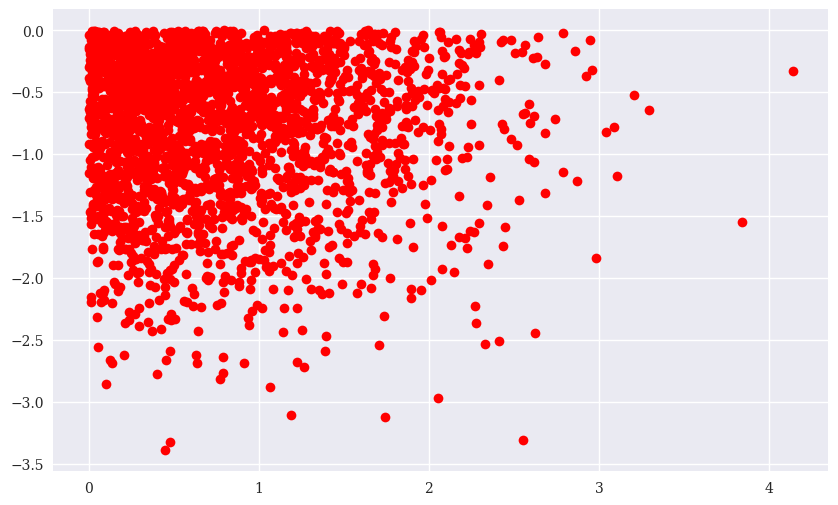

In [88]:
# 쿼리 결과 플롯
res = res[::100]
plt.figure(figsize=(10, 6))
plt.plot(res[:, 0], res[:, 1], 'ro')

### 9.2.2 SQL에서 pandas로
일반적으로 가장 효율적인 방법은 전체 테이블이나 쿼리 결과를 판다스로 한 번에 읽는 겁니다. 전체 테이블을 메모리에 읽어 들일 수 있다면 쿼리 작업은 디스크 기반의 SQL 작업보다 훨씬 빠르게 실행될 수 있습니다.  
전체 테이블을 판다스로 읽으면 넘파이 배열 객체를 읽을 때와 거의 비슷한 시간이 걸립니다. 여기에서 성능상의 병목은 SQL 데이터베이스입니다.

In [89]:
%time data = pd.read_sql('SELECT * FROM numbers', con) # 테이블의 모든 행을 읽고 data라는 이름의 DataFrame 객체에 넣습니다.

Wall time: 2.05 s


이제 데이터가 메모리상에 존재하므로 훨씬 더 빠르게 분석할 수 있습니다. 판다스는 속도 향상뿐 아니라 훨씬 복잡한 쿼리도 할 수 있습니다. 그렇다고 복잡한 관계형 데이터 구조에서 SQL을 완전히 대체할 수 있다는 것은 아닙니다. 다음 그림은 복합 조건을 가진 쿼리 결과입니다.

In [90]:
%time data[(data['No1'] > 0) & (data['No2'] < 0)].head() # 두 조건 결합

Wall time: 17 ms


,No1,No2,No3,No4,No5
2,0.1629,-0.8473,-0.8223,-0.4621,-0.5137
5,0.1893,-0.0207,-0.2104,0.9419,0.2551
8,1.4784,-0.3333,-0.7050,0.3586,-0.3937
10,0.8092,-0.9899,1.0364,-1.0453,0.0579
11,0.9065,-0.7757,-0.9267,0.7797,0.0863


In [91]:
%%time
q = '(No1 < -0.5 | No1 > 0.5) & (No2 < -1 | No2 > 1)' # 네 조건을 결합
res = data[['No1', 'No2']].query(q)

Wall time: 26 ms


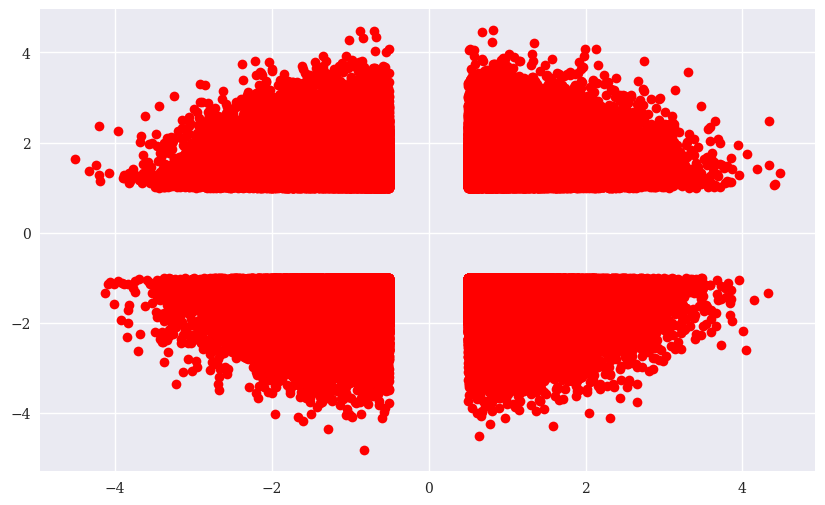

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(res['No1'], res['No2'], 'ro')

예상한 대로 판다스가 SQL문을 복제할 수만 있다면 판다스로 메모리사에서 데이터를 분석하는 것이 훨씬 빠른데, 이게 판다스의 유일한 장점은 아닙니다. 판다스는 다음 절에서 설명할 `PyTables`와 밀접하게 통합되어 있습니다. 판다스를 다음과 같이 `PyTables`와 결합하면 입출력 속도를 더 개선할 수 있습니다. 여기에서는 이러한 결합을 통해 I/O 연산 속도를 높일 수 있다는 것만 알면 됩니다. 다음 코드를 보죠.

In [93]:
h5s = pd.HDFStore(filename + '.h5s', 'w')

In [94]:
%time h5s['data'] = data

Wall time: 79 ms


In [95]:
h5s

<class 'pandas.io.pytables.HDFStore'>
File path: c:\Users\jktak\OneDrive\문서\P\pythonVScode\PythonForFinance\Temp\data\numbers.h5s

In [96]:
h5s.close()

SQL 테이블에서 전체 `DataFrame`으로 데이터를 쓰는 작업은 SQLite3로 같은 작업을 했을 때보다 빠릅니다. 읽기의 경우는 훨씬 더 빠릅니다.

In [97]:
%%time
h5s = pd.HDFStore(filename + '.h5s', 'r')
data_ = h5s['data']
h5s.close()

Wall time: 65 ms


In [98]:
data_ is data # 두 데이터베이스는 서로 다른 객체입니다.

False

In [99]:
(data_ == data).all() # 하지만 동일한 데이터를 담고 있습니다.

No1    True
No2    True
No3    True
No4    True
No5    True
dtype: bool

In [100]:
np.allclose(data_, data) # 동일한 데이터를 담고 있습니다.

True

### 9.2.3 CSV 파일 작업
데이터를 교환할 때 가장 널리 쓰이는 포맷 중 하나가 CSV 포맷이죠. 표준화 포맷이라고 할 수는 없지만 CSV 포맷은 데이터 분석이나 금융 분석을 하는 모든 플랫폼과 애플리케이션에서 처리 가능합니다. 9.1.2절에서 표준 파이썬 기능을 사용해 CSV 파일로 데이터를 읽고 쓰는 법을 이미 설명했는데, 판다스는 이 과정을 더 짧은 코드로 더 빠르고 편리하게 처리할 수 있습니다.

In [101]:
%time data.to_csv(filename + '.csv')

Wall time: 4.59 s


In [102]:
%time df = pd.read_csv(filename + '.csv')

Wall time: 541 ms


array([[<AxesSubplot:title={'center':'No1'}>,
        <AxesSubplot:title={'center':'No2'}>],
       [<AxesSubplot:title={'center':'No3'}>,
        <AxesSubplot:title={'center':'No4'}>]], dtype=object)

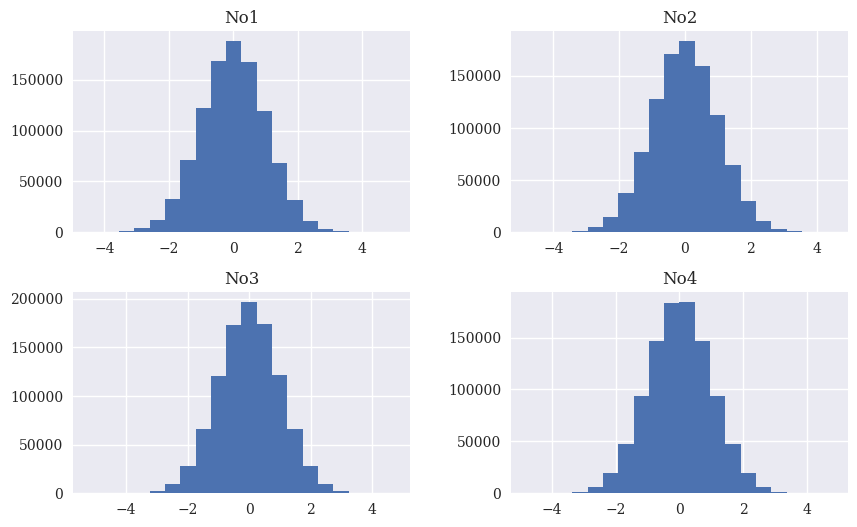

In [103]:
df[['No1', 'No2', 'No3', 'No4']].hist(bins=20, figsize=(10, 6))

### 9.2.4 엑셀 파일 작업
다음 코드는 판다스로 엑셀 스프레드시트 형식을 읽고 쓰는 것을 보입니다. 이 예제에서는 데이터를 100,000행으로 제한했습니다.

In [104]:
%time data[:100000].to_excel(filename + '.xlsx')

Wall time: 9.95 s


In [105]:
%time df = pd.read_excel(filename + '.xlsx', 'Sheet1')

Wall time: 7.97 s


<AxesSubplot:>

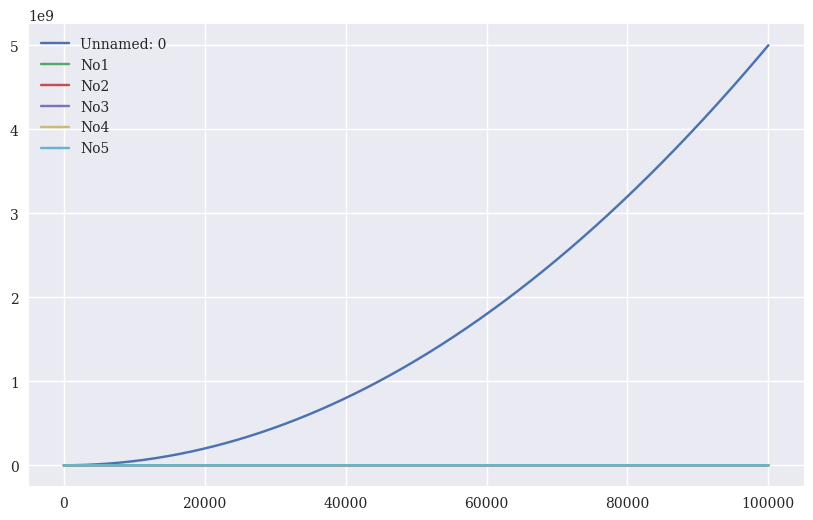

In [106]:
df.cumsum().plot(figsize=(10, 6))

데이터를 가진 엑셀 스프레드시트를 생성하는 데는 시간이 좀 걸렸습니다. 스프레드시트 구조가 가진 오버헤드 때문입니다.  
생성된 파일을 보면 `DataFrame`과 `HDFStore`를 조합한 경우가 가장 크기가 작은 것을 알 수 있습니다(후술할 데이터 압축을 사용하면 크기를 더 줄일 수 있습니다). 같은 양의 데이터를 가진 CSV 파일(텍스트 파일)의 크기가 더 큽니다. 이는 CSV 파일로 작업할 때 속도가 느려지는 이유 중 하나입니다. 다른 이유는 CSV 파일이 오직 일반적인 텍스트 파일이기 때문입니다.

## 9.3 PyTables를 이용한 입출력
`PyTables`는 HDF5 데이터베이스 파일 표준(http://www.hdfgroup.org)의 파이썬 바인딩입니다. HDF5는 입출력 연산의 성능을 최적화하고 가용 하드웨어를 최대한 이용할 수 있도록 설계되어 있습니다. 이 라이브러리의 임포트 이름은 `tables`입니다. 판다스와 마찬가지로 `PyTables`도 인메모리 분석 시 SQL 데이터베이스를 완전히 대체할 수는 없어도 그 간격을 메울 수 있는 몇 가지 기능이 있습니다. 예를 들어 `PyTables` 데이터베이스는 여러 개의 테이블을 가지고 있으며 압축, 인덱싱, 그리고 대부분의 쿼리문을 지원합니다. 또한 넘파이 배열을 효율적으로 저장할 수 있으며 배열과 유사한 나름의 자료구조를 가지고 있습니다.  
그럼 임포트부터 시작하죠.
> 패키지 이름은 `PyTables`이지만 임포트 이름은 `tables`입니다. 패키지를 설치할 때도 마찬가지입니다.

In [107]:
import tables as tb
import datetime as dt

### 9.3.1 테이블 작업
`PyTables`는 SQLite3처럼 파일 기반의 데이터베이스 포맷을 제공합니다. 다음 코드는 데이터베이스 파일을 열어 테이블을 생성합니다.
> 많은 다른 데이터베이스는 서버-클라이언트 구조를 요구합니다. 상호작용형 데이터 및 금융 분석에서는 파일 기반 데이터베이스가 좀 더 편리하고 대부분의 목적에 충분합니다.

In [108]:
filename = path + 'pytab.h5'

In [109]:
h5 = tb.open_file(filename, 'w') # HDF5 바이너리 저장 형식으로 데이터베이스 파일 열기

In [110]:
row_des = {
    'Date': tb.StringCol(26, pos=1), # 날짜 시간 정보를 위한 Date 열
    'No1': tb.IntCol(pos=2), # 정수 객체용 열
    'No2': tb.IntCol(pos=3), # 정수 객체용 열
    'No3': tb.Float64Col(pos=4), # 실수 객체용 열
    'No4': tb.Float64Col(pos=5) # 실수 객체용 열
}

In [111]:
rows = 2000000

In [112]:
filters = tb.Filters(complevel=0) # Filters 객체를 사용하여 압축 레벨 등을 지정

In [113]:
tab = h5.create_table('/', 'ints_floats', # 노드와 테이블의 이름
                      row_des, # 행 데이터 구조에 대한 설명
                      title='Integers and Floats', # 테이블 이름
                      expectedrows=rows, # 예상 행 개수(최적화를 위해 필요)
                      filters=filters) # 사용할 Filters 객체

In [114]:
type(tab)

tables.table.Table

In [115]:
tab

/ints_floats (Table(0,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

테이블에 숫자 데이터를 만들어 넣기 위해 두 개의 난수 `ndarray` 객체를 만들었습니다. 하나는 난수 정수, 다른 하나는 난수 실수를 가집니다. 테이블에 데이터를 넣는 것은 간단한 파이썬 반복문을 사용합니다.

In [116]:
pointer = tab.row # 포인터 객체 생성

In [117]:
ran_int = np.random.randint(0, 10000, size=(rows, 2)) # 난수 정수를 가진 ndarray 객체 생성

In [118]:
ran_flo = np.random.standard_normal((rows, 2)).round(4) # 난수 실수를 가진 ndarray 객체 생성

In [119]:
%%time
for i in range(rows):
    # datetime 객체와 두 개의 정수, 두 개의 실수를 행 단위로 쓰기
    pointer['Date'] = dt.datetime.now()
    pointer['No1'] = ran_int[i, 0]
    pointer['No2'] = ran_int[i, 1]
    pointer['No3'] = ran_flo[i, 0]
    pointer['No4'] = ran_flo[i, 1]
    pointer.append() # 새 행 추가
tab.flush() # 모든 행을 플러시(flush, 영구적으로 커밋하기)

Wall time: 6.79 s


In [120]:
tab

/ints_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

파이썬 루프를 사용하면 아주 느립니다. 같은 결과를 내기 위해 성능이 더 좋고 파이썬다운 방법은 넘파이 구조체 배열을 사용하는 것입니다. 전체 데이터를 구조체 배열로 지정한 다음에 테이블을 생성하면 한 줄의 코드만으로 끝납니다. 이제 더 이상 행을 일일이 서술할 필요가 없습니다. `PyTables`는 데이터 자료형을 유추할 때 구조체 배열의 `dtype` 객체를 사용합니다.

In [121]:
dty = np.dtype([('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'),
                ('No3', '<f8'), ('No4', '<f8')]) # 특수 dtype 객체 정의

In [122]:
sarray = np.zeros(len(ran_int), dtype=dty) # 0으로 채워진 구조화 배열 생성

In [123]:
sarray[:4] # ndarray 객체로 새로운 행 생성

array([(b'', 0, 0, 0., 0.), (b'', 0, 0, 0., 0.), (b'', 0, 0, 0., 0.),
       (b'', 0, 0, 0., 0.)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [124]:
# ndarray 객체의 열을 데이터로 채우기
%%time
sarray['Date']  = dt.datetime.now()
sarray['No1'] = ran_int[:, 0]
sarray['No2'] = ran_int[:, 1]
sarray['No3'] = ran_flo[:, 0]
sarray['No4'] = ran_flo[:, 1]

UsageError: Line magic function `%%time` not found.


In [125]:
%%time
h5.create_table('/', 'ints_floats_from_array', sarray,
                title='Integers and Floats',
                expectedrows=rows, filters=filters) # Table 객체 생성 및 데이터로 채우기

Wall time: 82 ms


/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

아래 방식은 훨씬 빠르고 코드가 간결하면서도 같은 결과를 얻을 수 있습니다.

In [126]:
type(h5)

tables.file.File

In [127]:
h5 # 두 개의 Table 객체를 가진 File 객체를 기술합니다.

File(filename=c:\Users\jktak\OneDrive\문서\P\pythonVScode\PythonForFinance\Temp\data\pytab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/ints_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)
/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [128]:
h5.remove_node('/', 'ints_floats_from_array') # 동일한 데이터를 가진 두 번째 테이블 삭제

테이블 객체는 넘파이 구조화 배열과 대부분의 경우에 같은 방식으로 동작합니다.

In [129]:
tab[:3] # 인덱싱으로 행 선택

array([(b'2023-05-27 20:58:48.454663', 8576, 5991, -0.0528, 0.2468),
       (b'2023-05-27 20:58:48.454663', 2990, 9310, -0.0261, 0.3932),
       (b'2023-05-27 20:58:48.454663', 4400, 4823,  0.9133, 0.2579)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [130]:
tab[:4]['No4'] # 인덱싱으로 열 값 선택

array([ 0.2468,  0.3932,  0.2579, -0.5582])

In [131]:
%time np.sum(tab[:]['No3']) # 넘파이 유니버설 함수 적용

Wall time: 62 ms


88.8542999999997

In [132]:
%time np.sum(np.sqrt(tab[:]['No1']))

Wall time: 88 ms


133349920.3689251

Wall time: 127 ms


(array([1.00000e+00, 0.00000e+00, 2.00000e+00, 2.00000e+01, 1.10000e+02,
        3.80000e+02, 1.32900e+03, 4.13500e+03, 1.09250e+04, 2.58570e+04,
        5.34720e+04, 9.70230e+04, 1.55324e+05, 2.16504e+05, 2.66456e+05,
        2.87214e+05, 2.73180e+05, 2.26867e+05, 1.65167e+05, 1.06402e+05,
        5.99730e+04, 2.96140e+04, 1.28280e+04, 4.93100e+03, 1.64700e+03,
        4.64000e+02, 1.29000e+02, 4.00000e+01, 5.00000e+00, 1.00000e+00]),
 array([-5.6489 , -5.28648, -4.92406, -4.56164, -4.19922, -3.8368 ,
        -3.47438, -3.11196, -2.74954, -2.38712, -2.0247 , -1.66228,
        -1.29986, -0.93744, -0.57502, -0.2126 ,  0.14982,  0.51224,
         0.87466,  1.23708,  1.5995 ,  1.96192,  2.32434,  2.68676,
         3.04918,  3.4116 ,  3.77402,  4.13644,  4.49886,  4.86128,
         5.2237 ]),
 <BarContainer object of 30 artists>)

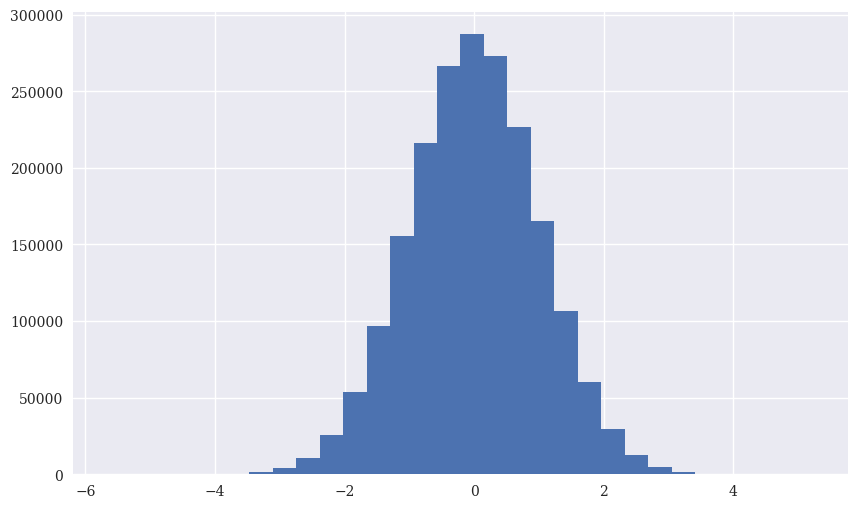

In [133]:
%%time
plt.figure(figsize=(10, 6)) # Table 객체의 열을 플롯
plt.hist(tab[:]['No3'], bins=30)

`PyTables`도 SQL과 유사한 문장으로 데이터를 쿼리할 수 있는 도구를 다음 예제와 같이 제공합니다. 결과는 아래와 같으니, 판다스 쿼리를 사용한 그 그림과 비교해봅시다.

In [134]:
query = '((No3 < -0.5) | (No3 > 0.5)) & ((No4 < -1) | (No4 > 1))' # 문자열 객체로 네 개의 조건이 결합된 쿼리 생성

In [135]:
iterator = tab.where(query) # 쿼리문에 기반한 반복자 객체

In [136]:
%time res = [(row['No3'], row['No4']) for row in iterator] # 쿼리 결과를 복합 리스트문으로 변환

Wall time: 178 ms


In [137]:
res = np.array(res)
res[:3]

array([[0.7694, 1.4866],
       [0.9201, 1.3346],
       [1.4701, 1.8776]])

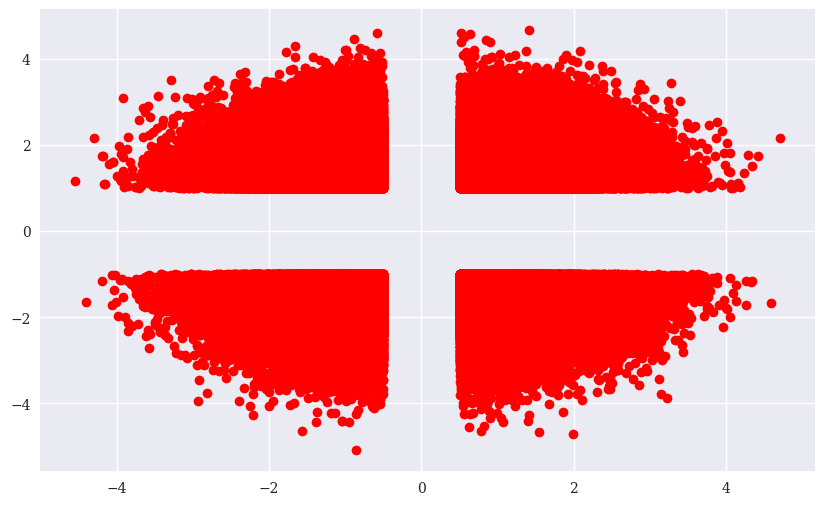

In [138]:
plt.figure(figsize=(10, 6))
plt.plot(res.T[0], res.T[1], 'ro')

> **TIP** 빠른 쿼리  
판다스와 `PyTables`는 모두 SQL과 같은 복잡한 쿼리와 선택을 처리할 수 있으며 이러한 연산을 위한 속도 최적화가 되어 있습니다. 관계형 데이터베이스에 비하면 한계가 있기는 하지만, 대부분의 수치 및 금융 애플리케이션에서는 큰 문제가 되지 않습니다.  

다음 예제에서 보이듯이 `Pytables Table` 객체에 저장된 데이터를 다루는 것은 문법이나 성능면에서 넘파이 또는 판다스 객체 인메모리를 사용해 메모리 상의 데이터를 다루는 듯한 느낌을 줍니다.

In [139]:
%%time
values = tab[:]['No3']
print(f'Max {values.max():18.3f}')
print(f'Avg {values.mean():18.3f}')
print(f'Min {values.min():18.3f}')
print(f'Std {values.std():18.3f}')

Max              5.224
Avg              0.000
Min             -5.649
Std              1.000
Wall time: 91 ms


In [140]:
%%time
res = [(row['No1'], row['No2']) for row in
       tab.where('((No1 > 9800) | (No1 > 200)) \
           & ((No2 > 4500) | (No2 < 5500))')]

Wall time: 554 ms


In [141]:
for r in res[:4]:
    print(r)

(8576, 5991)
(2990, 9310)
(4400, 4823)
(5673, 2945)


In [142]:
%%time
res = [(row['No1'], row['No2']) for row in
             tab.where('(No1 == 1234) & (No2 > 9776)')]

Wall time: 146 ms


In [143]:
for r in res:
    print(r)

(1234, 9841)
(1234, 9821)
(1234, 9867)
(1234, 9987)
(1234, 9849)
(1234, 9800)


### 9.3.2 압축 테이블 작업
`PyTables`의 장점을 압축을 사용하는 방식이라는 점입니다. 이를 통해 디스크 공간 절약뿐 아니라 입출력 연산 성능도 개선할 수 있습니다. 어떻게 이것이 가능할까요?  
CPU는 입출력 시스템이 병목 현상으로 지체되는 사이에 자료를 빠르게 압축하거나 해제할 수 있습니다. 따라서 압축으로 줄어든 데이터의 양만큼 발생한 입출력 속도 개선이 압축 연산으로 인한 속도 저하를 능가할 수 있습니다. 다음 예제는 SSD에서 작동하기 때문에 큰 속도 개선이 보이지 않지만, 중요한 점은 압축 사용으로 인한 속도 저하가 거의 없다는 점입니다.

In [144]:
filename = path + 'pytabc.h5'

In [145]:
h5c = tb.open_file(filename, 'w')

In [146]:
filters = tb.Filters(complevel=5, # 압축 수준. 0(압축 없음)부터 9(최고 압축)까지의 값을 가집니다.
                     complib='blosc') # 성능 최적화된 Blosc 압축 엔진 사용

In [147]:
tabc = h5c.create_table('/', 'ints_floats', sarray,
                        title='Integers and Floats',
                        expectedrows=rows, filters=filters)

In [148]:
query = '((No3 < -0.5) | (No3 > 0.5)) & ((No4 < -1) | (No4 > 1))'

In [149]:
iteratorc = tabc.where(query) # 쿼리에 기반한 반복자 객체 생성

In [150]:
%time res = [(row['No3'], row['No4']) for row in iteratorc] # 쿼리 결과 행을 복합 리스트문으로 변환

Wall time: 68 ms


In [151]:
res = np.array(res)
res[:3]

array([], dtype=float64)

테이블을 생성하고 분석하는 데 걸리는 시간이 압축을 사용하지 않았을 때와 비교하면 약간 느려졌습니다. 그럼 읽기 속도는 어떨까요?

In [152]:
%time arr_non = tab.read() # 압축되지 않은 Table 객체인 tab에서 읽습니다.

Wall time: 45 ms


In [153]:
tab.size_on_disk

100122200

In [154]:
arr_non.nbytes

100000000

In [155]:
%time arr_com = tabc.read() # 압축된 Table 객체인 tabc에서 읽습니다.

Wall time: 58 ms


In [156]:
tabc.size_on_disk

419436

In [157]:
arr_com.nbytes

100000000

In [158]:
h5c.close()

이 예제는 `Table` 객체를 압축해도 큰 속도 차이가 없다는 것을 보여줍니다. 하지만 파일의 크기는 데이터의 특성에 따라 크게 감소합니다. 이렇게 하면 여러 가지 장점이 있습니다.  
* 저장 비용 감소
* 백업 비용 감소  
* 네트워크 트래픽 감소
* 네트워크 속도 개선(원격 서버의 데이터 저장 및 검색 속도 개선)
* I/O 병목을 줄여서 CPU 사용량 증가

### 9.3.3 배열 작업
파이썬 기본 입출력에 관한 절에서 이미 넘파이가 빠른 `ndarray` 객체 읽기 및 쓰기 기능을 가졌음을 살펴보았습니다. `ndarray` 객체를 읽고 쓸 때 `PyTables`도 아주 빠르고 효율적입니다. 또한 `PyTables`은 계층적인 데이터베이스 구조를 가졌기 때문에 그에 따른 이점도 있습니다.

In [159]:
%%time
arr_int = h5.create_array('/', 'integers', ran_int) # ran_int ndarray 객체 저장
arr_flo = h5.create_array('/', 'floats', ran_flo) # ran_flo ndarray 객체 저장

Wall time: 28 ms


In [160]:
h5 # 변동사항이 객체 서술에 반영

File(filename=c:\Users\jktak\OneDrive\문서\P\pythonVScode\PythonForFinance\Temp\data\pytab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/floats (Array(2000000, 2)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/integers (Array(2000000, 2)) ''
  atom := Int32Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/ints_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [161]:
h5.close()

이런 객체를 HDF5 데이터베이스에 직접 쓰면 객체에 대한 루프를 돌려 `Table` 객체에 한 행씩 데이터를 쓰거나 구조화된 `ndarray` 객체를 사용하는 것보다 빠릅니다.  
> **TIP** HDF5 기반 데이터 저장  
The HDF5 계층구조 데이터베이스 파일 형식은 구조화된 수치 및 금융 데이터에 있어서 관계형 데이터베이스의 훌륭한 대체제입니다. 두 데이터 모두 `PyTables`로 직접 다룰 수 있고 판다스 기능과 결합할 수 있으며 하드웨어가 허락하는 최고의 입출력 성능을 기대할 수 있습니다.

### 9.3.4 out-of-memory 연산
`PyTables`는 메모리보다 큰 배열의 연산을 구현 가능하게 해주는 out-of-memory 연산을 지원합니다. 이를 위해 `EArray` 클래스에 기반한 다음과 같은 코드를 생각해보겠습니다. `EArray` 클래스 객체는 (행 방향으로) 증가할 수 있지만 열의 수는 고정되어 있습니다.

In [162]:
filename = path + 'earray.h5'

In [163]:
h5 = tb.open_file(filename, 'w')

In [164]:
n = 500 # 열의 수 고정

In [165]:
ear = h5.create_earray('/', 'ear', # EArray 객체의 경로와 이름 지정
                       atom=tb.Float64Atom(), # 하나의 값에 대한 dtype 객체
                       shape=(0, n)) # 객체의 크기(행 없음, 열 n개)

In [166]:
type(ear)

tables.earray.EArray

In [167]:
rand = np.random.standard_normal((n, n)) # 난수 ndarray 객체
rand[:4, :4]

array([[-1.25983231,  1.11420699,  0.1667485 ,  0.7345676 ],
       [-0.13785424,  1.22232417,  1.36303097,  0.13521042],
       [ 1.45487119, -1.47784078,  0.15027672,  0.86755989],
       [-0.63519366,  0.1516327 , -0.64939447, -0.45010975]])

In [168]:
%%time
for _ in range(750):
    ear.append(rand) # 반복하여 추가
ear.flush()

Wall time: 2.16 s


In [169]:
ear

/ear (EArray(375000, 500)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (16, 500)

In [170]:
ear.size_on_disk

1500032000

데이터 모음(aggregation)을 하지 않는 out-of-memory 연산의 경우에는 같은 크기를 가진 또다른 `EArray` 객체가 필요합니다. `PyTables`는 수치 연산을 효율적으로 할 수 있는 특별한 모듈을 가지고 있는데, 바로 `Expr` 모듈입니다. 이 모듈은 `numexpr`이라는 수치 연산 라이브러리를 기반으로 합니다. 다음 코드는 `Expr`을 이용하여 아래의 수치 연산을 수행합니다.  
$$y=3\sin\left(x\right)+\sqrt{\left|x\right|}$$  
결과는 출력용 `EArray` 객체에 저장되며, 연산은 청크(chunk) 단위로 실행됩니다.

In [171]:
out = h5.create_earray('/', 'out',
                       atom=tb.Float64Atom(),
                       shape=(0, n))

In [172]:
out.size_on_disk

0

In [173]:
expr = tb.Expr('3 * sin(ear) + sqrt(abs(ear))') # 문자열 객체 기반의 연산식을 Expr 객체로 변환

In [174]:
expr.set_output(out, append_mode=True) # 출력을 out이라는 EArray 객체로 지정

In [175]:
%time expr.eval() # 연산 시작

Wall time: 3.44 s


/out (EArray(375000, 500)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (16, 500)

In [176]:
out.size_on_disk

1500032000

In [177]:
out[0, :10]

array([-1.73369462,  3.74824436,  0.90627898,  2.86786818,  1.75424957,
       -0.91108973, -1.68313885,  1.29073295, -1.68665599, -1.71345309])

In [178]:
%time out_ = out.read() # 전체 EArray를 메모리로 올림

Wall time: 877 ms


In [179]:
out_[0, :10]

array([-1.73369462,  3.74824436,  0.90627898,  2.86786818,  1.75424957,
       -0.91108973, -1.68313885,  1.29073295, -1.68665599, -1.71345309])

전체 연산이 메모리 바깥에서 이루어진다는 점을 생각하면 표준 하드웨어에서 실행된 것치고 꽤 빠릅니다. 이 결과를 메모리 위에서 `numexpr` 모듈을 이용한 결과와 비교해보겠습니다. 빠르긴 하지만 그렇게 차이가 나지는 않습니다.

In [180]:
import numexpr as ne

In [181]:
expr = '3 * sin(out_) + sqrt(abs(out_))' # 수치 연산식 문자열

In [182]:
ne.set_num_threads(1) # 사용할 스레드를 1로 지정

8

In [183]:
%time ne.evaluate(expr)[0, :10] # 1개의 스레드에 수치 연산 실행

Wall time: 3.86 s


array([-1.64358578,  0.22567882,  3.31363043,  2.50443549,  4.27413965,
       -1.41600606, -1.68373023,  4.01921805, -1.68117412, -1.66053597])

In [184]:
ne.set_num_threads(8) # 스레드를 8로 지정

1

In [185]:
%time ne.evaluate(expr)[0, :10] # 8개의 스레드에 수치 연산 실행

Wall time: 840 ms


array([-1.64358578,  0.22567882,  3.31363043,  2.50443549,  4.27413965,
       -1.41600606, -1.68373023,  4.01921805, -1.68117412, -1.66053597])

In [186]:
h5.close()

## 9.4 TsTables를 이용한 입출력
TsTables 패키지는 PyTables를 사용하여 시계열 데이터의 고성능 저장을 수행합니다. 가장 많이 사용되는 경우는 '한 번 저장하고 여러 번 읽는 것'입니다. 이는 시장에서 만들어진 실시간 데이터를 디스크에 저장한 후 나중에 사용하는 금융 분석에서의 전형적인 경우입니다. 이러한 방법으로 여러 가지 금융 시계열을 반복적으로 사용하여 다양한 매매 전략의 백테스팅을 하는 프로그램에 적용할 수 있다. 이때 가장 중요한 것은 데이터를 빨리 읽을 수 있는 능력입니다. 
### 9.4.1 예제 데이터
지금까지와 마찬가지로 첫 번째로 해야 할 일은 `TsTables`의 장점을 보일 수 있을 정도로 큰 샘플 데이터를 생성하는 것입니다. 다음 코드는 기하 브라운 운동 시뮬레이션(12장 참조)을 기반으로 3개의 큰 금융 시계열 데이터를 생성합니다.

In [187]:
no = 5000000 # 시간 개수
co = 3 # 시계열 개수
interval = 1. / (12 * 30 * 24 * 60) # 연 단위 시간 간격
vol = 0.2 # 변동성

In [188]:
%%time
rn = np.random.standard_normal((no, co)) # 표준정규분포 난수
rn[0] = 0.0 # 최소 난수를 0으로 고정
paths = 100 * np.exp(np.cumsum(-0.5 * vol ** 2 * interval +
                               vol * np.sqrt(interval) * rn, axis=0)) # 오일러 이산화(Euler discritization) 방식의 시뮬레이션
paths[0] = 100 # 최초 값을 100으로 고정

Wall time: 787 ms


`TsTables` 패키지는 판다스 `DataFrame` 객체와 결합이 쉬우므로 데이터를 쉽게 변형할 수 있습니다.

In [189]:
dr = pd.date_range('2019-1-1', periods=no, freq='1s')

In [190]:
dr[-6:]

DatetimeIndex(['2019-02-27 20:53:14', '2019-02-27 20:53:15',
               '2019-02-27 20:53:16', '2019-02-27 20:53:17',
               '2019-02-27 20:53:18', '2019-02-27 20:53:19'],
              dtype='datetime64[ns]', freq='S')

In [191]:
df = pd.DataFrame(paths, index=dr, columns=['ts1', 'ts2', 'ts3'])

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000000 entries, 2019-01-01 00:00:00 to 2019-02-27 20:53:19
Freq: S
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   ts1     float64
 1   ts2     float64
 2   ts3     float64
dtypes: float64(3)
memory usage: 152.6 MB


In [193]:
df.head()

,ts1,ts2,ts3
2019-01-01 00:00:00,100.000000,100.000000,100.000000
2019-01-01 00:00:01,100.018443,99.966644,99.998255
2019-01-01 00:00:02,100.069023,100.004420,99.986646
2019-01-01 00:00:03,100.086757,100.000246,99.992042
2019-01-01 00:00:04,100.105448,100.036033,99.950618


<AxesSubplot:>

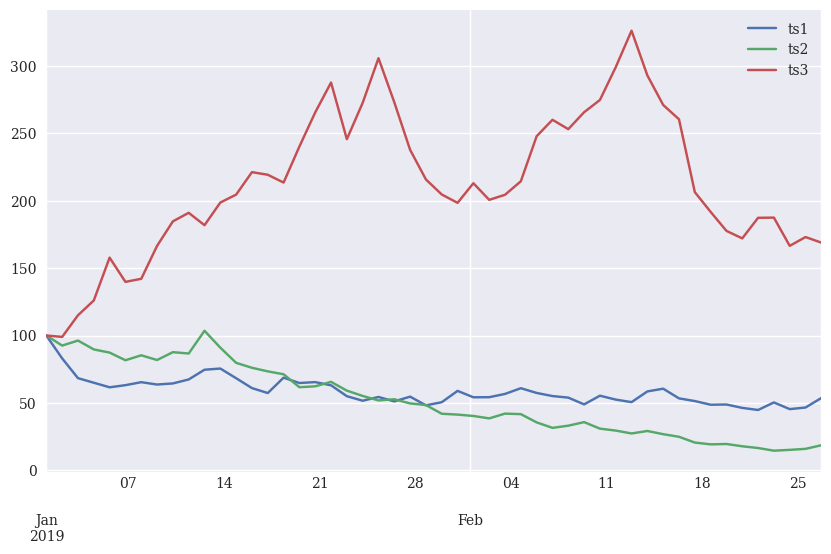

In [194]:
df[::100000].plot(figsize=(10, 6))

### 9.4.2 데이터 저장
`TsTables`는 임의의 위치에서 임의의 길이의 데이터를 빨리 읽을 수 있도록 금융 시계열 데이터를 특정한 청크(chunk) 기반의 구조로 만듭니다. 이렇게 하기 위해 `TsTables`는 `PyTables` 패키지에 `create_ts()` 함수를 추가합니다. 테이블 열에 사용되는 자료형을 제공하기 위해 다음 코드에서는 `PyTables`의 `tb.IsDescription` 클래스에 기반한 메서드를 사용했습니다.

In [195]:
import tstables as tstab

In [196]:
class ts_desc(tb.IsDescription):
    timestamp = tb.Int64Col(pos=0) # 타임스탬프 열
    ts1 = tb.Float64Col(pos=1) # 수치 데이터 열
    ts2 = tb.Float64Col(pos=2) # 수치 데이터 열
    ts3 = tb.Float64Col(pos=3) # 수치 데이터 열

In [197]:
h5 = tb.open_file(path + 'tstab.h5', 'w') # 쓰기 전용으로 HDF5 데이터베이스 파일 열기

In [198]:
ts = h5.create_ts('/', 'ts', ts_desc) # ts_desc 객체 기반으로 TsTable 객체 생성

In [199]:
%time ts.append(df) # TsTable 객체에 DataFrame 객체의 데이터 추가

Wall time: 781 ms


In [200]:
type(ts)

tstables.tstable.TsTable

### 9.4.3 데이터 읽기
`TsTables`로 데이터를 읽는 것은 하드웨어 성능에 의존하기는 하지만 아주 빠릅니다. 데이터를 메모리에 올리는 것도 마찬가지입니다. 편리하게도 `TsTables`는 `DataFrame` 객체를 반환합니다.

In [201]:
read_start_dt = dt.datetime(2019, 2, 1, 0, 0) # 구간 시작 시점
read_end_dt = dt.datetime(2019, 2, 5, 23, 59) # 구간 종료 시점

In [202]:
%time rows = ts.read_range(read_start_dt, read_end_dt) # ts.read_range() 함수는 해당 구간의 DataFrame 객체를 반환합니다.

Wall time: 73 ms


In [203]:
rows.head()

,ts1,ts2,ts3
2019-02-01 00:00:00,52.063640,40.474580,217.324713
2019-02-01 00:00:01,52.087455,40.471911,217.250070
2019-02-01 00:00:02,52.084808,40.458013,217.228712
2019-02-01 00:00:03,52.073536,40.451408,217.302912
2019-02-01 00:00:04,52.056133,40.450951,217.207481


In [204]:
h5.close()

<AxesSubplot:>

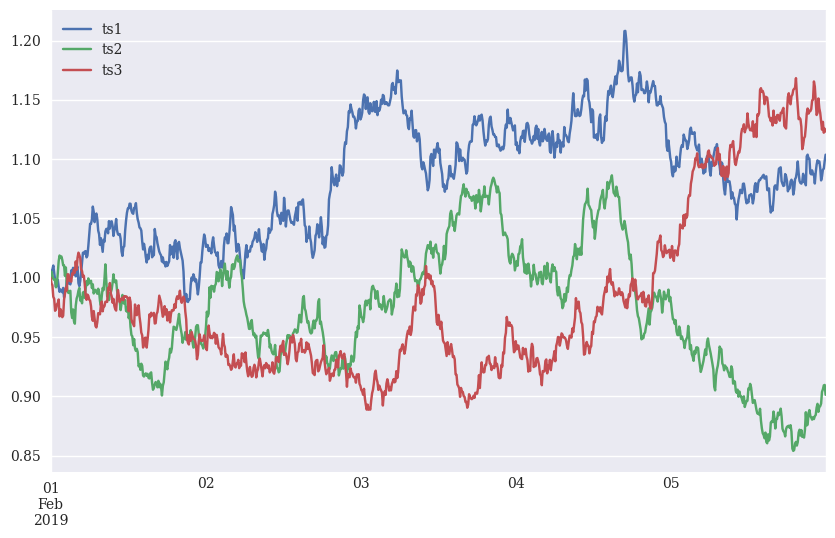

In [205]:
(rows[::500] / rows.iloc[0]).plot(figsize=(10, 6))

`TsTables` 방식의 데이터 읽기 성능을 더 잘 보이기 위해 다음과 같이 1초 봉으로 이루어진 3일 간의 데이터를 100개의 청크로 나누어 읽는 벤치마크를 실시합니다. 읽어들인 `DataFrame`은 345,600개의 행을 가지고 있으며 읽는 데 10분의 1초 이하가 걸립니다.

In [206]:
import random

In [207]:
h5 = tb.open_file(path + 'tstab.h5', 'r')

In [209]:
ts = h5.root.ts._f_get_timeseries() # TsTable 객체 연결

In [210]:
%%time
for _ in range(100): # 반복하여 데이터 읽기
    d = random.randint(1, 24) # 시작 날짜 값을 난수화
    read_start_dt = dt.datetime(2019, 2, d, 0, 0, 0)
    read_end_dt = dt.datetime(2019, 2, d + 3, 23, 59, 59)
    rows = ts.read_range(read_start_dt, read_end_dt)

Wall time: 4.48 s


In [211]:
rows.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 345600 entries, 2019-02-15 00:00:00 to 2019-02-18 23:59:59
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ts1     345600 non-null  float64
 1   ts2     345600 non-null  float64
 2   ts3     345600 non-null  float64
dtypes: float64(3)
memory usage: 10.5 MB


## 9.5 마치며
SQL 관계형 데이터베이스는 개별 객체/테이블 간에 많은 관계를 보이는 복잡한 자료구조를 다룰 때 이점을 가집니다. 반대로 어떤 상황에서는 순수한 넘파이 `ndarray` 기반이나 판다스 `DataFrame` 기반의 방식보다 성능이 떨어질 수도 있습니다.  
금융이나 과학기술 분야의 많은 응용 영역에서는 배열 기반의 자료 모델링 방식이 성공적일 수 있습니다. 이 경우에는 넘파이 입출력 기능을 이용하거나 넘파이와 `PyTables` 기능을 조합하거나, 또는 HDF5 기반의 저장소를 이용하는 판다스 기능을 사용하는 것이 성능 향상에 훨씬 도움이 됩니다. 특히 `TsTables`는 금융 시계열 데이터를 한 번 쓰고 여러 번 읽는 경우에 효율적입니다.  
최근의 경향은 클라우스 기반의 솔루션(클라우드는 저가의 하드웨어로 이루어진 수많은 계산 노드로 이루어집니다)을 사용하는 것인데, 금융 분석을 할 때는 분석 기능에 중점을 두고 하드웨어 구조를 구성해야 한다는 점을 주의 깊게 고려해야 합니다. 마이크로소프트의 최근 연구도 이 점을 강조하고 있죠.  

> 우리는 이런 종류의 작업에서는 단일 '스케일업' 서버가 성능, 비용, 전력 및 서버 밀도 면에서 클러스터와 같거나 더 낫다고 주장한다.  
-Appuswamy et al.(2013)  

회사나 연구소, 자료 분석에 관계된 모든 사람은 특정한 작업을 어떻게 수행해야 하는지를 먼저 분석하고 다음과 같은 관점에서 하드웨어와 소프트웨어 구조를 결정해야 합니다.  
* 스케일 아웃: 표준 CPU와 상대적으로 낮은 메모리가 장착된 다수의 저가 노드를 가진 클러스터를 사용하는 경우
* 스케일 업: 다수의 코어를 가진 CPU, GPU, TPU 그리고 대량의 메모리가 장착된 소소의 강력한 서버를 사용하는 경우

하드웨어를 스케일 업하고 적절하게 구현하면 성능을 크게 향상시킬 수 있습니다. 다음 장에서 이에 대해 다뤄보죠.

## 9.6 참고 문헌
이 장의 서두와 결론에서 인용된 논문은 금융 분석에 필요한 하드웨어 구조에 대해 생각할 수 있는 좋은 출발점이 될 겁니다.  

* Appuswamy, Raja, et al. (2013). "Nobody Ever Got Fired for Buying a Cluster", Microsoft Technical Report, http://research.microsoft.com/apps/pubs/default.aspx?id=179615.  

다음 웹사이트는 이 장에서 다룬 주제에 대한 다양하고 중요한 정보를 제공합니다.
* http://docs.python.org/3/library/pickle.html
* http://docs.scipy.org/doc/numpy/reference/routines.io.html
* http://pandas.pydata.org/pandas-docs/stable/io.html
* http://www.pytables.org
* `TsTables`에 대한 더 자세한 정보는 깃허브 페이지에 있습니다.

`TsTables` 레포의 깃 포크(git fork)는 http://github.com/yhilpisch/tstables입니다. `pip install git+git://github.com/yhilpisch/tstables` 명령을 사용하면 이 포크를 설치할 수 있습니다. 이 포크를 쓰면 새 버전의 판다스나 다른 파이썬 패키지와 호환성이 유지됩니다.